<a href="https://colab.research.google.com/github/gentilhimal/Stock-Prediction/blob/main/multivariate_GRU_AMZN_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict 
#the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
dataset = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2020-11-24') 
#Show the data 
data=dataset.drop(['High', 'Low','Open','Adj Close'], axis=1)
data

,Close,Volume
Date,,
2012-01-03,179.029999,5110800
2012-01-04,177.509995,4205200
2012-01-05,177.610001,3809100
2012-01-06,182.610001,7008400
2012-01-09,178.559998,5056900
...,...,...
2020-11-18,3105.459961,2916800
2020-11-19,3117.020020,3010300
2020-11-20,3099.399902,3374400


In [ ]:
y_data=dataset.filter(['Close']).values
y_test=y_data
y_data

array([[ 179.02999878],
       [ 177.50999451],
       [ 177.61000061],
       ...,
       [3099.39990234],
       [3098.38989258],
       [3118.06005859]])

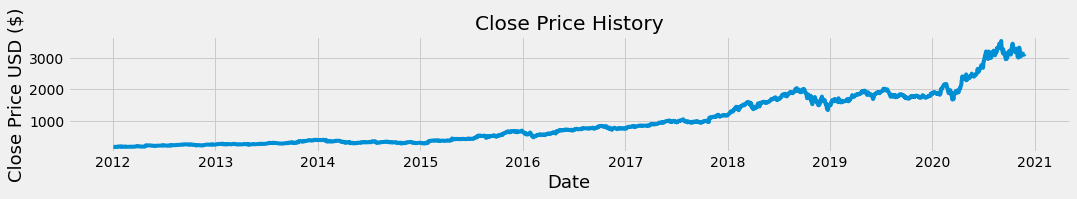

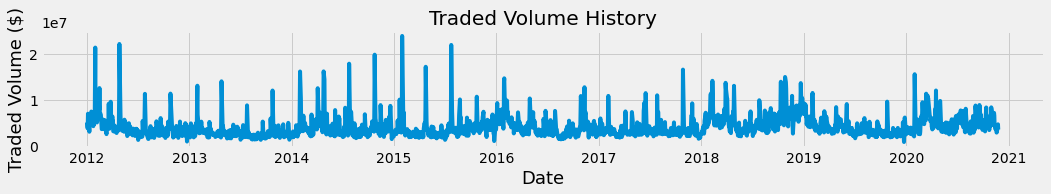

In [ ]:
#Visualize the closing price history

plt.figure(figsize=(16,2))
plt.title('Close Price History')
plt.plot(dataset['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

plt.figure(figsize=(16,2))
plt.title('Traded Volume History')
plt.plot(dataset['Volume'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Traded Volume ($)',fontsize=18)
plt.show()

In [ ]:
# Converting the dataframe to a numpy array
dataset = data.values

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

1792

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
y_data=scaler.fit_transform(y_data)
len(y_data)

2240

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len, : ]
print(len(train_data))
#Split the data into x_train and y_train data sets
x_train=train_data
y_train_data=[]
for i in range(60,len(train_data)):
     y_train_data.append(y_data[i,0])
y_train_data

1792


[0.00854711290330825,
 0.007921276630691705,
 0.006592126004188785,
 0.007071932600562943,
 0.005382180121341645,
 0.005501384864997426,
 0.004750382247331465,
 0.003293082201397575,
 0.0035881200808944302,
 0.004398725070388278,
 0.0037341497571368246,
 0.0028520191930278133,
 0.003713286425943846,
 0.004511972760019911,
 0.00452091288842562,
 0.0041871314209243685,
 0.0036685857839152958,
 0.004291438982150286,
 0.0055103249934031345,
 0.005978212934359503,
 0.015174999421119863,
 0.016679978636094377,
 0.01612566793809298,
 0.01618825338430243,
 0.015949839349621388,
 0.014322672316609546,
 0.01467135096654066,
 0.014295847384022932,
 0.014021672835719055,
 0.015127315704709758,
 0.01542234903683714,
 0.014006771105919712,
 0.01444187706026532,
 0.014343531100433037,
 0.01264483849280603,
 0.01130078613650378,
 0.012570334391178807,
 0.011741849144873535,
 0.01232298022809205,
 0.011715028759656416,
 0.011014688385412634,
 0.011568999083414015,
 0.009923947246221268,
 0.011020649986

In [ ]:
x_final=np.empty((1,2))
for i in range(60,len(train_data)):
    x_final=np.concatenate((x_final,x_train[i-60:i]),axis=0)
x_final = np.delete(x_final, (0), axis=0)
x_final.shape
print(x_final)

[[0.00092385 0.18409301]
 [0.00047087 0.14467591]
 [0.00050067 0.12743528]
 ...
 [0.43572383 0.17311576]
 [0.43631688 0.11660602]
 [0.43114631 0.14098926]]


In [ ]:
x_train=x_final

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train_data)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (1732,60,x_train.shape[1]))

In [ ]:
x_train[0]

array([[9.23852679e-04, 1.84093006e-01],
       [4.70866468e-04, 1.44675906e-01],
       [5.00669928e-04, 1.27435277e-01],
       [1.99075196e-03, 2.66687849e-01],
       [7.83784604e-04, 1.81746958e-01],
       [1.01623704e-03, 1.35126312e-01],
       [8.85109091e-04, 9.66885457e-02],
       [0.00000000e+00, 1.96062643e-01],
       [7.42062489e-04, 1.68541184e-01],
       [1.70763728e-03, 2.07322806e-01],
       [4.02620456e-03, 2.86931769e-01],
       [5.51926512e-03, 2.70500723e-01],
       [4.47024610e-03, 2.05834218e-01],
       [3.02784778e-03, 1.61220119e-01],
       [3.29904380e-03, 1.65072166e-01],
       [3.53745784e-03, 1.49080732e-01],
       [5.18250967e-03, 2.17294601e-01],
       [5.79343967e-03, 1.64427982e-01],
       [4.83382648e-03, 1.97729686e-01],
       [5.51628659e-03, 5.17562721e-01],
       [1.05200210e-03, 8.90336369e-01],
       [1.72551754e-03, 3.41896339e-01],
       [3.50169278e-03, 3.15093058e-01],
       [2.14870029e-03, 1.92763376e-01],
       [2.461618

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(GRU(units=50, return_sequences=True,input_shape=(x_train.shape[1],2)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
history=model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1732/1732 [==============================] - 39s 21ms/step - loss: 0.0021
Epoch 2/3
1732/1732 [==============================] - 37s 21ms/step - loss: 1.9003e-04
Epoch 3/3
1732/1732 [==============================] - 37s 21ms/step - loss: 1.7085e-04


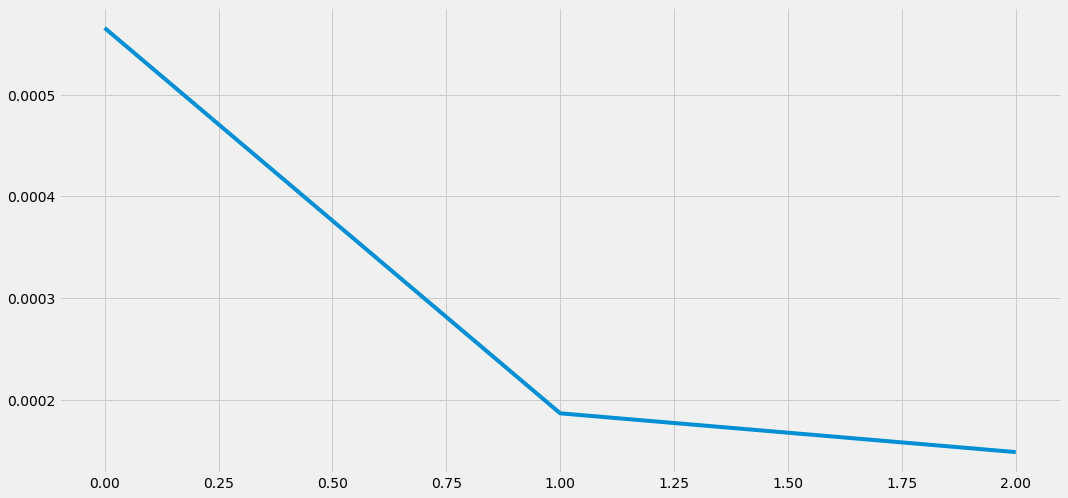

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='train')

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test =  test_data #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
x_final_test=np.empty((1,2))
y_test =  y_test[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_final_test=np.concatenate((x_final_test,test_data[i-60:i]),axis=0)
x_final_test = np.delete(x_final_test, (0), axis=0)
x_test=x_final_test
print(len(y_test))
print(len(x_test))

448
26880


In [ ]:
#Convert x_test to a numpy array 
y_test = np.array(y_test)
y_test

array([[1627.57995605],
       [1622.09997559],
       [1619.43994141],
       [1631.56005859],
       [1633.        ],
       [1636.40002441],
       [1641.08996582],
       [1639.82995605],
       [1671.72998047],
       [1696.17004395],
       [1692.43005371],
       [1668.94995117],
       [1625.94995117],
       [1620.80004883],
       [1670.61999512],
       [1673.09997559],
       [1690.81005859],
       [1686.2199707 ],
       [1712.35998535],
       [1742.15002441],
       [1761.84997559],
       [1797.27001953],
       [1819.26000977],
       [1764.77001953],
       [1774.26000977],
       [1783.76000977],
       [1765.69995117],
       [1773.42004395],
       [1780.75      ],
       [1814.18994141],
       [1813.97998047],
       [1820.69995117],
       [1818.85998535],
       [1837.2800293 ],
       [1849.85998535],
       [1835.83996582],
       [1847.32995605],
       [1844.06994629],
       [1843.06005859],
       [1844.86999512],
       [1863.04003906],
       [1864.819

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (448,60,x_test.shape[1]))
print(x_test)
print(y_test[62])

[[[0.39825722 0.30070773]
  [0.39324158 0.43515069]
  [0.39958039 0.21046973]
  ...
  [0.43631688 0.11660602]
  [0.43114631 0.14098926]
  [0.42676544 0.15071296]]

 [[0.39324158 0.43515069]
  [0.39958039 0.21046973]
  [0.39520852 0.07949144]
  ...
  [0.43114631 0.14098926]
  [0.42676544 0.15071296]
  [0.43261551 0.12189007]]

 [[0.39958039 0.21046973]
  [0.39520852 0.07949144]
  [0.41883225 0.23401292]
  ...
  [0.42676544 0.15071296]
  [0.43261551 0.12189007]
  [0.43098238 0.10691279]]

 ...

 [[0.96082576 0.14727005]
  [0.9613622  0.08773526]
  [0.97601266 0.14383585]
  ...
  [0.88204807 0.11157442]
  [0.87304799 0.08859707]
  [0.87649308 0.09266675]]

 [[0.9613622  0.08773526]
  [0.97601266 0.14383585]
  [0.99036518 0.11295419]
  ...
  [0.87304799 0.08859707]
  [0.87649308 0.09266675]
  [0.871242   0.10851455]]

 [[0.97601266 0.14383585]
  [0.99036518 0.11295419]
  [1.         0.13276285]
  ...
  [0.87649308 0.09266675]
  [0.871242   0.10851455]
  [0.870941   0.16659993]]]
[1869.]


In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling
predictions.shape

(448, 1)

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

62.38485668626862

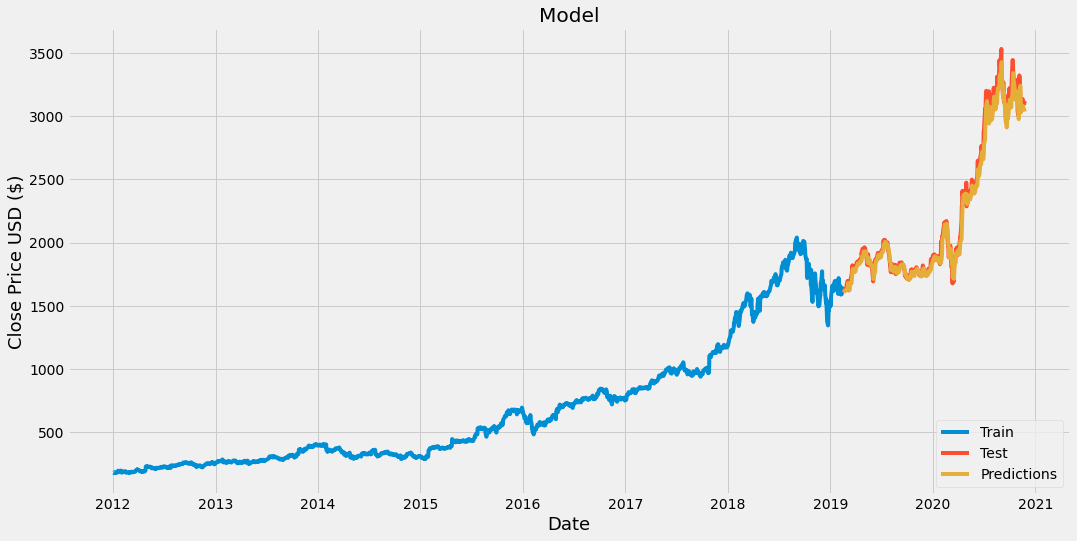

                  Close  predictions
Date                                
2019-02-19  1627.579956  1607.887085
2019-02-20  1622.099976  1614.758667
2019-02-21  1619.439941  1616.014648
2019-02-22  1631.560059  1613.593506
2019-02-25  1633.000000  1619.593506
...                 ...          ...
2020-11-18  3105.459961  3080.898193
2020-11-19  3117.020020  3065.203613
2020-11-20  3099.399902  3063.553467
2020-11-23  3098.389893  3049.116455
2020-11-24  3118.060059  3036.006836

[448 rows x 2 columns]


In [ ]:
# #Plot/Create the data for the graph
train = data[:training_data_len]
test = data[training_data_len:]
train=train['Close']
test=test['Close']
valid=pd.DataFrame(test)
valid['predictions']=predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()
print(valid)

In [ ]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2019-02-19,1627.579956,1607.887085
2019-02-20,1622.099976,1614.758667
2019-02-21,1619.439941,1616.014648
2019-02-22,1631.560059,1613.593506
2019-02-25,1633.000000,1619.593506
...,...,...
2020-11-18,3105.459961,3080.898193
2020-11-19,3117.020020,3065.203613
2020-11-20,3099.399902,3063.553467


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-24')
#Create a new dataframe
new_df = apple_quote.drop(['High', 'Low','Open','Adj Close'], axis=1)
x_final_test=np.empty((1,2))
x_final_test=np.concatenate((x_final_test,new_df[-60:]),axis=0)
x_final_test = np.delete(x_final_test, (0), axis=0)
test_data=x_final_test
#Scale the data to be values between 0 and 1
test_data_scaled = scaler.transform(test_data)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test=test_data_scaled
#Reshape the data
X_test = np.reshape(X_test, (1,60,X_test.shape[1]))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(X_test)
pred_price

[[[-1.24421850e-02  4.54385389e+04]
  [-1.32706702e-02  5.96386928e+04]
  [-1.64058018e-02  7.67688547e+04]
  [-1.63819600e-02  9.91223501e+04]
  [-1.88078133e-02  6.89509903e+04]
  [-1.74667395e-02  5.27311195e+04]
  [-1.86081429e-02  5.43207093e+04]
  [-1.90521867e-02  5.38992843e+04]
  [-1.80508514e-02  4.17669767e+04]
  [-1.79972083e-02  5.50262929e+04]
  [-1.90134454e-02  4.60968273e+04]
  [-1.95468950e-02  5.30501461e+04]
  [-2.05899524e-02  8.55619182e+04]
  [-1.96243776e-02  5.83258710e+04]
  [-1.91088105e-02  5.45534601e+04]
  [-2.05065059e-02  4.49165929e+04]
  [-2.01786883e-02  4.99902031e+04]
  [-1.89687425e-02  4.46968654e+04]
  [-1.81700584e-02  4.10285815e+04]
  [-1.84293335e-02  2.96174737e+04]
  [-1.79167449e-02  4.25194980e+04]
  [-1.76246878e-02  3.46057319e+04]
  [-1.87482110e-02  4.31264978e+04]
  [-1.77111129e-02  3.16623431e+04]
  [-1.87064866e-02  4.81290608e+04]
  [-1.81342956e-02  2.88625385e+04]
  [-1.81670776e-02  2.48775227e+04]
  [-1.75710448e-02  2.995265

array([[-2396.1904]], dtype=float32)

In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AMZN', data_source='yahoo', start='2020-11-25', end='2020-11-25')
print(apple_quote2['Close'])

Date
2020-11-25    3185.070068
Name: Close, dtype: float64


In [ ]:
X_test.shape[0]

1

In [ ]:
X_test.shape[1]

60